In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dealing with type and nans

In [21]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED
0,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N101NN,...,6.0,1912,1832,-40,0.0,-2.0,1900-1959,0,NaN,0
1,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N101NN,...,6.0,940,925,-15,0.0,-1.0,0900-0959,0,NaN,0
2,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N102UW,...,11.0,1206,1142,-24,0.0,-2.0,1200-1259,0,NaN,0
3,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N103NN,...,12.0,29,27,-2,0.0,-1.0,0001-0559,0,NaN,0
4,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N103NN,...,16.0,1140,1111,-29,0.0,-2.0,1100-1159,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539742,2025,1,1,31,5,1/31/2025 12:00:00 AM,YX,20452,YX,N979RP,...,13.0,1732,1756,24,24.0,1.0,1700-1759,0,NaN,0
539743,2025,1,1,31,5,1/31/2025 12:00:00 AM,YX,20452,YX,N979RP,...,7.0,1223,1205,-18,0.0,-2.0,1200-1259,0,NaN,0
539744,2025,1,1,31,5,1/31/2025 12:00:00 AM,YX,20452,YX,N979RP,...,11.0,1500,1440,-20,0.0,-2.0,1500-1559,0,NaN,0
539745,2025,1,1,31,5,1/31/2025 12:00:00 AM,YX,20452,YX,N979RP,...,11.0,900,847,-13,0.0,-1.0,0900-0959,0,NaN,0


In [3]:
df = pd.read_csv("C:\\Users\DELL\Downloads\T_ONTIME_REPORTING_20250512_025426\T_ONTIME_REPORTING.csv")

In [10]:
float_cols = df.select_dtypes(include=['float']).columns
print(float_cols)

Index(['DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP', 'TAXI_OUT',
       'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DELAY_GROUP',
       'CANCELLED', 'DIVERTED'],
      dtype='object')


In [18]:
float_cols_to_change=['DEP_TIME','ARR_TIME','DEP_DELAY','ARR_DELAY','CANCELLED', 'DIVERTED']
df[float_cols_to_change] = df[float_cols_to_change].astype(int)


In [16]:
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)
df['DEP_TIME'] = df['DEP_TIME'].fillna(df['CRS_DEP_TIME'])
df['ARR_TIME'] = df['ARR_TIME'].fillna(df['CRS_ARR_TIME'])


In [6]:
df.isna().any().any()
df.isna().sum()


YEAR                          0
QUARTER                       0
MONTH                         0
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
FL_DATE                       0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2530
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN_CITY_MARKET_ID         0
ORIGIN                        0
ORIGIN_CITY_NAME              0
ORIGIN_STATE_ABR              0
ORIGIN_STATE_NM               0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST_CITY_MARKET_ID           0
DEST                          0
DEST_CITY_NAME                0
DEST_STATE_ABR                0
DEST_STATE_NM                 0
CRS_DEP_TIME                  0
DEP_TIME                  15886
DEP_DELAY                 15923
DEP_DELAY_NEW             15923
DEP_DELAY_GROUP           15923
DEP_TIME_BLK                  0
TAXI_OUT

In [20]:
df = df.dropna(subset=['TAIL_NUM'])
df.to_csv("C:\\Users\DELL\Downloads\T_ONTIME_REPORTING_20250512_025426\T_ONTIME_REPORTING2.csv")

## finished dealing with fact data types and nans

In [25]:
months=pd.unique(facts['MONTH'])
print(months)

[1]


In [5]:
airports_unique=pd.unique(facts['ORIGIN'])

In [ ]:
airlines_unique=pd.unique(facts[])


In [16]:
print(facts['DEP_DELAY'])

0         -6.0
1         -3.0
2         -2.0
3         -8.0
4         -5.0
          ... 
539742    30.0
539743    -8.0
539744    -9.0
539745    -3.0
539746    29.0
Name: DEP_DELAY, Length: 539747, dtype: float64


In [12]:
print(airports_unique)
print(len(airports_unique))

['SFO' 'JFK' 'SAT' 'BOS' 'LAX' 'PHX' 'SMF' 'CMH' 'DFW' 'MEM' 'OKC' 'CLE'
 'CLT' 'EWR' 'DSM' 'BNA' 'CHS' 'AUS' 'BHM' 'BWI' 'MCI' 'PHL' 'LGA' 'EUG'
 'MDT' 'TPA' 'GRR' 'BOI' 'ORD' 'MSN' 'SRQ' 'IND' 'SAN' 'PBI' 'RSW' 'EYW'
 'SDF' 'DEN' 'STT' 'LAS' 'FAT' 'GEG' 'ATL' 'PNS' 'BUF' 'SLC' 'PIT' 'XNA'
 'PSP' 'JAX' 'MCO' 'ONT' 'RDU' 'TUS' 'MIA' 'MSY' 'SJU' 'FLL' 'PDX' 'TYS'
 'SEA' 'MSP' 'ELP' 'STL' 'VPS' 'BDL' 'STX' 'DCA' 'SNA' 'HDN' 'ORF' 'IAH'
 'KOA' 'EGE' 'HNL' 'OGG' 'ANC' 'LIH' 'RIC' 'DTW' 'CID' 'PVD' 'ABQ' 'SAV'
 'MKE' 'OMA' 'SYR' 'ALB' 'CVG' 'RNO' 'SBA' 'COS' 'CAE' 'MRY' 'LIT' 'TUL'
 'SBP' 'FSD' 'ROC' 'ECP' 'LBB' 'AVP' 'GUC' 'BZN' 'BFL' 'ILM' 'AMA' 'MTJ'
 'MFE' 'BUR' 'JAC' 'SJC' 'PWM' 'IAD' 'MSO' 'GSP' 'GSO' 'OAK' 'FAI' 'PAE'
 'DAL' 'RDM' 'JNU' 'ADK' 'KTN' 'SIT' 'PSC' 'BQN' 'PQI' 'HPN' 'ISP' 'PSE'
 'ORH' 'IDA' 'FCA' 'BIL' 'LGB' 'HRL' 'TVC' 'ROA' 'TLH' 'ICT' 'BTV' 'BIS'
 'GRB' 'DAB' 'FAR' 'HSV' 'MDW' 'HOU' 'MYR' 'GPT' 'JAN' 'MLB' 'GNV' 'TTN'
 'PGD' 'TOL' 'PBG' 'PIE' 'SGF' 'SFB' 'SPI' 'ABE' 'A

In [5]:
carriers=pd.unique(facts['OP_UNIQUE_CARRIER'])

In [6]:
print(carriers)

['AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA' 'WN' 'YX']


In [7]:
print(facts.head(10))

   YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK               FL_DATE  \
0  2025        1      1             1            3  1/1/2025 12:00:00 AM   
1  2025        1      1             1            3  1/1/2025 12:00:00 AM   
2  2025        1      1             1            3  1/1/2025 12:00:00 AM   
3  2025        1      1             1            3  1/1/2025 12:00:00 AM   
4  2025        1      1             1            3  1/1/2025 12:00:00 AM   
5  2025        1      1             1            3  1/1/2025 12:00:00 AM   
6  2025        1      1             1            3  1/1/2025 12:00:00 AM   
7  2025        1      1             1            3  1/1/2025 12:00:00 AM   
8  2025        1      1             1            3  1/1/2025 12:00:00 AM   
9  2025        1      1             1            3  1/1/2025 12:00:00 AM   

  OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  ...  TAXI_IN  \
0                AA                  19805         AA   N101NN  ...      6.0   
1  

(array([ 75088.,  18163.,  17918.,  76306.,  15526.,   9345.,   6690.,
         21890.,  17544.,  21094.,  65036.,  62007., 105307.,  27833.]),
 array([ 0.        ,  0.92857143,  1.85714286,  2.78571429,  3.71428571,
         4.64285714,  5.57142857,  6.5       ,  7.42857143,  8.35714286,
         9.28571429, 10.21428571, 11.14285714, 12.07142857, 13.        ]),
 <BarContainer object of 14 artists>)

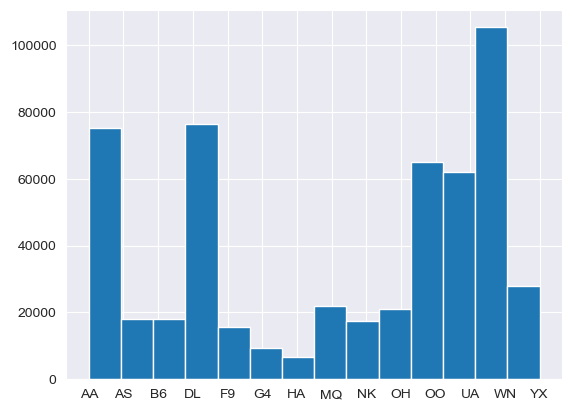

In [11]:
plt.hist(facts['OP_UNIQUE_CARRIER'],bins=14)

In [13]:
decode=pd.read_csv("C:\\Users\DELL\Downloads\T_CARRIER_DECODE_20250512_031801\T_CARRIER_DECODE.csv")

In [14]:
print(decode)

      AIRLINE_ID CARRIER CARRIER_ENTITY  \
0          19031     MAC          30550   
1          19032      XY          04530   
2          19033     COC          30337   
3          19034     GSA          37760   
4          19035     RZZ          30012   
...          ...     ...            ...   
2832       22139      A7          71303   
2833       22140     SNM          71304   
2834       22141      DM          71305   
2835       22142     JTH          71306   
2836       22143      G2          71307   

                                      CARRIER_NAME UNIQUE_CARRIER  \
0                        Mackey International Inc.            MAC   
1                      Munz Northern Airlines Inc.             XY   
2                            Cochise Airlines Inc.            COC   
3                        Golden Gate Airlines Inc.            GSA   
4                                    Aeromech Inc.            RZZ   
...                                            ...            ...   


In [15]:
for i in range(0,len(decode)):
    if decode.iloc[i,1] in carriers:
        print(decode.iloc[i,:])


AIRLINE_ID                                19393
CARRIER                                      WN
CARRIER_ENTITY                            06725
CARRIER_NAME             Southwest Airlines Co.
UNIQUE_CARRIER                               WN
UNIQUE_CARRIER_ENTITY                     06725
UNIQUE_CARRIER_NAME      Southwest Airlines Co.
WAC                                          10
CARRIER_GROUP                                 3
CARRIER_GROUP_NEW                             3
REGION                                 Domestic
START_DATE_SOURCE          1/1/1979 12:00:00 AM
THRU_DATE_SOURCE                            NaN
Name: 369, dtype: object
AIRLINE_ID                                19393
CARRIER                                      WN
CARRIER_ENTITY                            11033
CARRIER_NAME             Southwest Airlines Co.
UNIQUE_CARRIER                               WN
UNIQUE_CARRIER_ENTITY                     11033
UNIQUE_CARRIER_NAME      Southwest Airlines Co.
WAC            

In [18]:
print(facts.iloc[133:135,:])

     YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK               FL_DATE  \
133  2025        1      1             1            3  1/1/2025 12:00:00 AM   
134  2025        1      1             1            3  1/1/2025 12:00:00 AM   

    OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  ...  \
133                AA                  19805         AA   N127AA  ...   
134                AA                  19805         AA   N127AA  ...   

     TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY ARR_DELAY_NEW ARR_DELAY_GROUP  \
133     30.0          1959    2009.0       10.0          10.0             0.0   
134      5.0          2207    2211.0        4.0           4.0             0.0   

    ARR_TIME_BLK CANCELLED  CANCELLATION_CODE  DIVERTED  
133    1900-1959       0.0                NaN       0.0  
134    2200-2259       0.0                NaN       0.0  

[2 rows x 42 columns]


In [27]:
weather=pd.read_csv("C:\\Users\DELL\Desktop\StormEvents_details-ftp_v1.0_d2024_c20250401.csv")

In [31]:
len(weather)

70196

In [28]:
print(weather.columns)

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')


In [29]:
print(pd.unique(weather['EVENT_TYPE']))

['Hail' 'Heavy Snow' 'Tornado' 'Thunderstorm Wind' 'High Wind'
 'Funnel Cloud' 'Heavy Rain' 'Drought' 'Flash Flood' 'Winter Weather'
 'Marine Thunderstorm Wind' 'Winter Storm' 'Flood' 'Avalanche'
 'Astronomical Low Tide' 'Strong Wind' 'Waterspout' 'Lightning'
 'Coastal Flood' 'Blizzard' 'Extreme Cold/Wind Chill' 'Wildfire' 'Heat'
 'Debris Flow' 'Lake-Effect Snow' 'Dust Storm' 'Rip Current' 'Dense Fog'
 'High Surf' 'Marine High Wind' 'Cold/Wind Chill' 'Ice Storm'
 'Frost/Freeze' 'Sneakerwave' 'Freezing Fog' 'Excessive Heat' 'Sleet'
 'Marine Hail' 'Dust Devil' 'Marine Dense Fog' 'Tropical Storm'
 'Storm Surge/Tide' 'Marine Tropical Storm' 'Hurricane'
 'Marine Hurricane/Typhoon' 'Marine Strong Wind' 'Tropical Depression'
 'Seiche' 'Marine Tropical Depression' 'Lakeshore Flood']


In [24]:
weather[weather['EVENT_TYPE']=='Tornado']

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
4,199505,9,1005,199505,9,1008,NaN,10313846,ALABAMA,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A tornado was observed to touch down near the ...,CSV
13,199505,10,40,199505,10,40,NaN,10313847,ALABAMA,1,...,0,NaN,NaN,30.500000,-88.350000,NaN,NaN,NaN,A tornado was reported near the eleven mile ma...,CSV
45,199507,4,2012,199507,4,2012,NaN,10314250,ALABAMA,1,...,0,NaN,NaN,34.030000,-88.170000,NaN,NaN,NaN,A tornado was reported at Henson Springs in no...,CSV
54,199504,11,1015,199504,11,1015,NaN,10314454,ALABAMA,1,...,0,NaN,NaN,32.520000,-86.370000,32.530000,-86.300000,NaN,What appeared to be a small tornado damaged a ...,CSV
55,199503,7,1710,199503,7,1710,NaN,10314063,ALABAMA,1,...,0,NaN,NaN,34.530000,-86.600000,NaN,NaN,NaN,Thunderstorm winds blew the roof off one house...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20459,199505,18,625,199505,18,628,NaN,990000010,KENTUCKY,21,...,6,NW,Wilmore,37.900090,-84.802287,37.907270,-84.756500,The F2 tornado began in Mayo in Central Mercer...,NaN,NaN
20460,199505,18,619,199505,18,625,NaN,10324805,KENTUCKY,21,...,6,SE,Salvisa,37.854430,-84.867670,37.862820,-84.773060,The tornado began as an F1 with wind speeds of...,NaN,NaN
20461,199505,18,625,199505,18,629,NaN,990000011,KENTUCKY,21,...,13,SSE,Versailles,37.862820,-84.773060,37.872220,-84.706256,The tornado began as an F1 with wind speeds of...,NaN,NaN
20462,199505,18,629,199505,18,644,NaN,990000012,KENTUCKY,21,...,6,NE,Nicholasville,37.872220,-84.706256,37.929175,-84.473024,The tornado began as an F1 with wind speeds of...,NaN,NaN


In [30]:
weather[weather['BEGIN_DAY']!=weather['END_DAY']]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
1,202411,16,230,202411,18,1421,197838,1223377,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A series of cold fronts the weekend of Nov. 16...,The Hog Pass SNOTEL reported an estimated 12 i...,CSV
9,202411,17,1100,202411,18,2100,197535,1221931,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A cold frontal boundary arriving on Nov 17th f...,Bear Grass SNOTEL at 4720 ft recorded 20 inche...,CSV
11,202411,17,1100,202411,18,2100,197535,1221930,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A cold frontal boundary arriving on Nov 17th f...,The Red Hill SNOTEL at 4410ft recorded 19 inch...,CSV
12,202411,17,1000,202411,18,2100,197535,1221932,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A cold frontal boundary arriving on Nov 17th f...,McKenzie SNOTEL at 4770 ft recorded 16 inches ...,CSV
13,202411,17,1000,202411,18,2100,197536,1221933,WASHINGTON,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A cold frontal boundary arriving on Nov 17th f...,June Lake SNOTEL at 3440 ft recorded 18 inches...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70150,202407,16,0,202407,30,0,195621,1209116,ALABAMA,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thanks to some late-month rainfall for the are...,D3 Conditions were removed thanks to recent ra...,CSV
70151,202407,16,0,202407,23,0,195621,1209118,ALABAMA,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thanks to some late-month rainfall for the are...,D3 Conditions were removed thanks to recent ra...,CSV
70153,202407,24,1300,202407,26,0,195257,1206980,CALIFORNIA,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Several wildfires erupted in July, mainly late...",Grove wildfire started around 1 pm PDT on July...,CSV
70177,202407,16,0,202407,23,0,195621,1209119,ALABAMA,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thanks to some late-month rainfall for the are...,D3 Conditions were removed thanks to recent ra...,CSV


In [8]:
planes=pd.read_csv("C:\\Users\DELL\Downloads\plane-data.csv")

## Planes joined flights

In [10]:
planes_for_join=planes.iloc[:,[0,8]]

In [11]:
planes_for_join.dropna(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13972\1022968873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_for_join.dropna(inplace=True)


In [12]:
planes_for_join

,tailnum,year
34,N10156,2004.0
35,N102UW,1998.0
36,N10323,1986.0
37,N103US,1999.0
38,N104UA,1998.0
...,...,...
5024,N997DL,1992.0
5025,N998AT,2002.0
5026,N998DL,1992.0
5027,N999CA,1998.0


In [15]:
facts_for_join=facts.iloc[:,[0,1,2,3,6,9]]

In [16]:
facts_for_join

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM
0,2025,1,1,1,AA,N101NN
1,2025,1,1,1,AA,N101NN
2,2025,1,1,1,AA,N102UW
3,2025,1,1,1,AA,N103NN
4,2025,1,1,1,AA,N103NN
...,...,...,...,...,...,...
539742,2025,1,1,31,YX,N979RP
539743,2025,1,1,31,YX,N979RP
539744,2025,1,1,31,YX,N979RP
539745,2025,1,1,31,YX,N979RP


In [22]:
unique_pairs = filtered_df[['TAIL_NUM', 'OP_UNIQUE_CARRIER']].drop_duplicates()


In [23]:
unique_pairs

,TAIL_NUM,OP_UNIQUE_CARRIER
0,N101NN,AA
2,N102UW,AA
3,N103NN,AA
6,N103US,AA
10,N104NN,AA
...,...,...
528835,276NV,G4
532996,N778SK,OO
535219,N77587,UA
535899,N276WN,WN


In [20]:
filtered_df = facts_for_join[facts_for_join['TAIL_NUM'].notna() & (facts_for_join['TAIL_NUM'].str.len() > 0)]

In [21]:
filtered_df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM
0,2025,1,1,1,AA,N101NN
1,2025,1,1,1,AA,N101NN
2,2025,1,1,1,AA,N102UW
3,2025,1,1,1,AA,N103NN
4,2025,1,1,1,AA,N103NN
...,...,...,...,...,...,...
539742,2025,1,1,31,YX,N979RP
539743,2025,1,1,31,YX,N979RP
539744,2025,1,1,31,YX,N979RP
539745,2025,1,1,31,YX,N979RP


In [5]:
pd.unique(planes['type'])

array([nan, 'Corporation', 'Co-Owner', 'Individual', 'Partnership',
       'Foreign Corporation'], dtype=object)

In [7]:
planes_cleaned=planes.dropna() 

In [11]:
planes_cleaned.loc['year'] = planes_cleaned['year'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16536\465180287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_cleaned['year'] = planes_cleaned['year'].astype(int)


In [13]:
planes_cleaned.loc[:,'year'] = planes_cleaned.loc[:,'year'].astype(int)


In [14]:
planes_cleaned

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [15]:
planes_cleaned_reset = planes_cleaned.reset_index()
planes_cleaned_reset.rename(columns={'index': 'id'}, inplace=True)
planes_cleaned_reset.to_csv('C:\\Users\DELL\Downloads\planes.csv', index=False)



#PI

In [3]:
import pandas as pd
import glob

csv_files = glob.glob("C:\\Users\DELL\Downloads\Set_res\*.csv")

for file in csv_files:
    df = pd.read_csv(file)

    # Process each dataframe individually
    print(f"\nProcessing {file}:")
    avg_metrics = df.groupby(['type', 'strategy', 'metric'])['value'].mean().reset_index()

    print(f"\nAverage metrics by (type, strategy) in {file}:")
    print("-" * 60)
    for (type_val, strategy_val), group in avg_metrics.groupby(['type', 'strategy']):
        print(f"\nType: {type_val} | Strategy: {strategy_val}")
        for _, row in group.iterrows():
            print(f"  {row['metric']}: {row['value']:.4f}")




Processing C:\Users\DELL\Downloads\Set_res\arrhythmia.csv:

Average metrics by (type, strategy) in C:\Users\DELL\Downloads\Set_res\arrhythmia.csv:
------------------------------------------------------------

Type: augmentation | Strategy: ADASYN
  accuracy: 0.9510
  auc: 0.9606
  f1-score: 0.5785
  g-mean: 0.2315
  precision: 0.7056
  recall: 0.5587

Type: augmentation | Strategy: BorderlineSMOTE
  accuracy: 0.9508
  auc: 0.9580
  f1-score: 0.5728
  g-mean: 0.2179
  precision: 0.6979
  recall: 0.5539

Type: augmentation | Strategy: SMOTE
  accuracy: 0.9516
  auc: 0.9653
  f1-score: 0.5844
  g-mean: 0.2466
  precision: 0.7307
  recall: 0.5609

Type: augmentation | Strategy: random
  accuracy: 0.9474
  auc: 0.9594
  f1-score: 0.5231
  g-mean: 0.0984
  precision: 0.5837
  recall: 0.5219

Type: bagging | Strategy: ADASYN
  accuracy: 0.9463
  auc: 0.9669
  f1-score: 0.5045
  g-mean: 0.0492
  precision: 0.5281
  recall: 0.5110

Type: bagging | Strategy: BorderlineSMOTE
  accuracy: 0.9457
 

In [7]:
import pandas as pd
import glob
import os

# Get all CSV files
csv_files = glob.glob("C:\\Users\\DELL\\Downloads\\Set_res\\*.csv")

# List to collect processed data
result_rows = []

for file in csv_files:
    df = pd.read_csv(file)

    # Group and compute mean for each (type, strategy, metric)
    avg_metrics = df.groupby(['type', 'strategy', 'metric'])['value'].mean().reset_index()

    # Pivot so metrics become columns
    pivot_df = avg_metrics.pivot_table(
        index=['type', 'strategy'],
        columns='metric',
        values='value'
    ).reset_index()

    # Add a column for file name (basename only, not full path)
    pivot_df['file'] = os.path.basename(file)

    # Append to results
    result_rows.append(pivot_df)

# Combine all into one DataFrame
final_df = pd.concat(result_rows, ignore_index=True)

# Optional: re-order columns so 'file', 'type', 'strategy' come first
metric_columns = [col for col in final_df.columns if col not in ['file', 'type', 'strategy']]
final_df = final_df[['file', 'type', 'strategy'] + metric_columns]

# Show or export the final result
print(final_df)

output_path = "C:\\Users\\DELL\\Downloads\\aggregated_results.xlsx"
final_df.to_excel(output_path, index=False)


metric              file          type         strategy  accuracy       auc  \
0         arrhythmia.csv  augmentation           ADASYN  0.950989  0.960616   
1         arrhythmia.csv  augmentation  BorderlineSMOTE  0.950769  0.957977   
2         arrhythmia.csv  augmentation            SMOTE  0.951648  0.965279   
3         arrhythmia.csv  augmentation           random  0.947363  0.959372   
4         arrhythmia.csv       bagging           ADASYN  0.946264  0.966884   
..                   ...           ...              ...       ...       ...   
76      wine_quality.csv       bagging           ADASYN  0.963531  0.892724   
77      wine_quality.csv       bagging  BorderlineSMOTE  0.965347  0.893554   
78      wine_quality.csv       bagging            SMOTE  0.964551  0.900057   
79      wine_quality.csv       bagging           random  0.966500  0.888396   
80      wine_quality.csv      baseline                -  0.966602  0.883014   

metric  f1-score    g-mean  precision    recall  
0

In [6]:
!pip install openpyxl


In [2]:
planes_active=pd.read_csv("C:\\Users\DELL\Downloads\ReleasableAircraft\MASTER.txt")

In [4]:
planes_active.head()

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
0,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,...,...,...,...,20270430,600060,,,A004B3,NaN
1,10000,10000,2130004,,,7,9AT LLC ...,511 WEDGEWOOD AVE,,NASHVILLE,...,...,...,...,...,20310831,1443200,,,A00725,NaN
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,...,...,...,...,20290228,432072,,,A00726,NaN
3,10004,T18208245,2072738,,,7,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,...,...,...,...,...,20290331,102879,,,A00729,NaN
4,10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,...,...,...,...,...,20280229,480110,,,A0072B,NaN


In [5]:
actf=pd.read_csv("C:\\Users\DELL\Downloads\ReleasableAircraft\ACFTREF.txt")

In [7]:
actf.head()

,CODE,MFR,MODEL,TYPE-ACFT,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,Unnamed: 13
0,0020901,AAR AIRLIFT GROUP INC,UH-60A,6,3,1,0,2,15,CLASS 3,0,,...,NaN
1,0030109,EXLINE ACE-C,ACE-C,4,1,1,1,1,1,CLASS 1,82,,...,NaN
2,003010D,DELEBAUGH,P,4,1,1,1,1,1,CLASS 1,82,,...,NaN
3,003010H,DAL PORTO,BABY ACE D,4,1,1,1,1,1,CLASS 1,82,,...,NaN
4,003010P,DUNN,BABY ACE,4,1,1,1,1,1,CLASS 1,82,,...,NaN


In [13]:
is_unique = actf['CODE'].is_unique

columns_list = actf.columns.tolist()
print(columns_list)
print(is_unique)

['CODE', 'MFR', 'MODEL', 'TYPE-ACFT', 'TYPE-ENG', 'AC-CAT', 'BUILD-CERT-IND', 'NO-ENG', 'NO-SEATS', 'AC-WEIGHT', 'SPEED', 'TC-DATA-SHEET', 'TC-DATA-HOLDER', 'Unnamed: 13']
True


In [10]:
columns_list = actf.columns.tolist()
print(columns_list)


['CODE', 'MFR', 'MODEL', 'TYPE-ACFT', 'TYPE-ENG', 'AC-CAT', 'BUILD-CERT-IND', 'NO-ENG', 'NO-SEATS', 'AC-WEIGHT', 'SPEED', 'TC-DATA-SHEET', 'TC-DATA-HOLDER', 'Unnamed: 13']


In [14]:
merged_df = planes_active.merge(actf,left_on='MFR MDL CODE', right_on='CODE', how='left')


In [15]:
merged_df.head()

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,Unnamed: 13
0,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,1,1,0,1,2,CLASS 1,67,,...,NaN
1,10000,10000,2130004,,,7,9AT LLC ...,511 WEDGEWOOD AVE,,NASHVILLE,...,1,1,0,1,5,CLASS 1,0,,...,NaN
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,1,1,0,1,3,CLASS 1,79,,...,NaN
3,10004,T18208245,2072738,,,7,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,...,2,1,0,1,4,CLASS 1,0,3A13,TEXTRON AVIATION INC ...,NaN
4,10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,...,1,1,0,1,4,CLASS 1,0,,...,NaN


In [16]:
# Aircraft type codes
aircraft_type_map = {
    '1': 'Glider',
    '2': 'Balloon',
    '3': 'Blimp/Dirigible',
    '4': 'Fixed wing single engine',
    '5': 'Fixed wing multi engine',
    '6': 'Rotorcraft',
    '7': 'Weight-shift-control',
    '8': 'Powered Parachute',
    '9': 'Gyroplane',
    'H': 'Hybrid Lift',
    'O': 'Other'
}

# Engine type codes
engine_type_map = {
    '0': 'None',
    '1': 'Reciprocating',
    '2': 'Turbo-prop',
    '3': 'Turbo-shaft',
    '4': 'Turbo-jet',
    '5': 'Turbo-fan',
    '6': 'Ramjet',
    '7': '2 Cycle',
    '8': '4 Cycle',
    '9': 'Unknown',
    '10': 'Electric',
    '11': 'Rotary'
}


In [18]:
merged_df['aircraft_type_resolved'] = merged_df['TYPE AIRCRAFT'].astype(str).map(aircraft_type_map)
merged_df['engine_type_resolved'] = merged_df['TYPE ENGINE'].astype(str).map(engine_type_map)

merged_df.head()


,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,Unnamed: 13,aircraft_type_resolved,engine_type_resolved
0,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,0,1,2,CLASS 1,67,,...,NaN,Fixed wing single engine,Reciprocating
1,10000,10000,2130004,,,7,9AT LLC ...,511 WEDGEWOOD AVE,,NASHVILLE,...,0,1,5,CLASS 1,0,,...,NaN,Fixed wing single engine,Reciprocating
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,0,1,3,CLASS 1,79,,...,NaN,Fixed wing single engine,Reciprocating
3,10004,T18208245,2072738,,,7,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,...,0,1,4,CLASS 1,0,3A13,TEXTRON AVIATION INC ...,NaN,Fixed wing single engine,Turbo-prop
4,10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,...,0,1,4,CLASS 1,0,,...,NaN,Fixed wing single engine,Reciprocating


In [19]:
# Ensure the column is treated as string
merged_df['N-NUMBER'] = 'N' + merged_df['N-NUMBER'].astype(str)
merged_df.head()


,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,Unnamed: 13,aircraft_type_resolved,engine_type_resolved
0,N100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,0,1,2,CLASS 1,67,,...,NaN,Fixed wing single engine,Reciprocating
1,N10000,10000,2130004,,,7,9AT LLC ...,511 WEDGEWOOD AVE,,NASHVILLE,...,0,1,5,CLASS 1,0,,...,NaN,Fixed wing single engine,Reciprocating
2,N10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,0,1,3,CLASS 1,79,,...,NaN,Fixed wing single engine,Reciprocating
3,N10004,T18208245,2072738,,,7,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,...,0,1,4,CLASS 1,0,3A13,TEXTRON AVIATION INC ...,NaN,Fixed wing single engine,Turbo-prop
4,N10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,...,0,1,4,CLASS 1,0,,...,NaN,Fixed wing single engine,Reciprocating


In [21]:
allegiant_planes = merged_df[merged_df['NAME'].str.contains("Allegiant", case=False, na=False)]


In [22]:
len(allegiant_planes)

34

In [29]:
alaskap = merged_df[merged_df['NAME'].str.contains("United Airlines", case=False, na=False)]


In [30]:
len(alaskap)

1145

In [31]:
print(alaskap)

       N-NUMBER                   SERIAL NUMBER MFR MDL CODE ENG MFR MDL  \
654      N10156  145786                              3260214       54582   
5173     N11106  145650                              3260214       54582   
5174     N11107  145654                              3260214       54582   
5175     N11109  145657                              3260214       54582   
5192     N11113  145662                              3260214       54571   
...         ...                             ...          ...         ...   
268291   N89349  17000662                            3260410       30061   
268305   N89357  17000694                            3260415       30061   
268319   N89362  17000856                            3260979       30061   
273948   N91007  40929                               1386010       30238   
282544   N93305  17000412                            326041A       30061   

       YEAR MFR TYPE REGISTRANT  \
654        2004               3   
5173       2002  

In [32]:
codes_to_drop = ['1', '2', '3', '8', 'H']
df_filtered = merged_df[~merged_df['TYPE AIRCRAFT'].isin(codes_to_drop)].copy()

# Optional: reset index after filtering
df_filtered.reset_index(drop=True, inplace=True)


In [34]:
pd.unique(df_filtered['TYPE AIRCRAFT'])

array(['4', '6', '5', '7', '9', 'O'], dtype=object)

In [35]:
len(df_filtered)

289683

In [36]:
airports=pd.read_csv("C:\\Users\DELL\Downloads\T_MASTER_CORD_20250603_072303\T_MASTER_CORD.csv")

In [37]:
airports

,AIRPORT_SEQ_ID,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL,AIRPORT_WAC,AIRPORT_COUNTRY_NAME,AIRPORT_COUNTRY_CODE_ISO,AIRPORT_STATE_NAME,AIRPORT_STATE_CODE,...,LATITUDE,LON_DEGREES,LON_HEMISPHERE,LON_MINUTES,LON_SECONDS,LONGITUDE,AIRPORT_START_DATE,AIRPORT_THRU_DATE,AIRPORT_IS_CLOSED,AIRPORT_IS_LATEST
0,1000101,10001,01A,Afognak Lake Airport,"Afognak Lake, AK",1,United States,US,Alaska,AK,...,58.109444,152.0,W,54.0,24.0,-152.906667,7/1/2007 12:00:00 AM,NaN,0,1
1,1000301,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK",1,United States,US,Alaska,AK,...,65.548056,161.0,W,4.0,18.0,-161.071667,7/1/2007 12:00:00 AM,NaN,0,1
2,1000401,10004,04A,Lik Mining Camp,"Lik, AK",1,United States,US,Alaska,AK,...,68.083333,163.0,W,10.0,0.0,-163.166667,7/1/2007 12:00:00 AM,NaN,0,1
3,1000501,10005,05A,Little Squaw Airport,"Little Squaw, AK",1,United States,US,Alaska,AK,...,67.570000,148.0,W,11.0,2.0,-148.183889,8/1/2007 12:00:00 AM,NaN,0,1
4,1000601,10006,06A,Kizhuyak Bay,"Kizhuyak, AK",1,United States,US,Alaska,AK,...,57.745278,152.0,W,52.0,58.0,-152.882778,10/1/2007 12:00:00 AM,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,1706501,17065,7FL,Wellington Aero Club,"West Palm Beach, FL",33,United States,US,Florida,FL,...,26.646667,80.0,W,17.0,42.0,-80.295000,1/1/2025 12:00:00 AM,NaN,0,1
19216,1706601,17066,BE3,Kleine Brogel Airport,"Kleine Brogel , Belgium",409,Belgium,BE,NaN,NaN,...,51.167778,5.0,E,28.0,16.0,5.471111,1/1/2025 12:00:00 AM,NaN,0,1
19217,1706701,17067,GOX,Manohar International,"Goa, India",733,India,IN,NaN,NaN,...,15.744444,73.0,E,51.0,40.0,73.861111,1/1/2025 12:00:00 AM,NaN,0,1
19218,1706801,17068,HSR,Rajkot International,"Rajkot, India",733,India,IN,NaN,NaN,...,22.388056,71.0,E,1.0,42.0,71.028333,10/1/2024 12:00:00 AM,NaN,0,1


In [39]:
farp=airports[(airports['AIRPORT_COUNTRY_CODE_ISO'] == 'US') & (airports['AIRPORT_IS_LATEST'] == 1)]

In [40]:
farp

,AIRPORT_SEQ_ID,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL,AIRPORT_WAC,AIRPORT_COUNTRY_NAME,AIRPORT_COUNTRY_CODE_ISO,AIRPORT_STATE_NAME,AIRPORT_STATE_CODE,...,LATITUDE,LON_DEGREES,LON_HEMISPHERE,LON_MINUTES,LON_SECONDS,LONGITUDE,AIRPORT_START_DATE,AIRPORT_THRU_DATE,AIRPORT_IS_CLOSED,AIRPORT_IS_LATEST
0,1000101,10001,01A,Afognak Lake Airport,"Afognak Lake, AK",1,United States,US,Alaska,AK,...,58.109444,152.0,W,54.0,24.0,-152.906667,7/1/2007 12:00:00 AM,NaN,0,1
1,1000301,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK",1,United States,US,Alaska,AK,...,65.548056,161.0,W,4.0,18.0,-161.071667,7/1/2007 12:00:00 AM,NaN,0,1
2,1000401,10004,04A,Lik Mining Camp,"Lik, AK",1,United States,US,Alaska,AK,...,68.083333,163.0,W,10.0,0.0,-163.166667,7/1/2007 12:00:00 AM,NaN,0,1
3,1000501,10005,05A,Little Squaw Airport,"Little Squaw, AK",1,United States,US,Alaska,AK,...,67.570000,148.0,W,11.0,2.0,-148.183889,8/1/2007 12:00:00 AM,NaN,0,1
4,1000601,10006,06A,Kizhuyak Bay,"Kizhuyak, AK",1,United States,US,Alaska,AK,...,57.745278,152.0,W,52.0,58.0,-152.882778,10/1/2007 12:00:00 AM,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19212,1706201,17062,6FL,Arcadia Municipal,"Arcadia, FL",33,United States,US,Florida,FL,...,27.195278,81.0,W,50.0,18.0,-81.838333,1/1/2025 12:00:00 AM,NaN,0,1
19213,1706301,17063,2OH,Richard Downing,"Coshocton, OH",44,United States,US,Ohio,OH,...,40.310278,81.0,W,51.0,9.0,-81.852500,1/1/2025 12:00:00 AM,NaN,0,1
19214,1706401,17064,KY8,Stanton Airport,"Stanton, KY",52,United States,US,Kentucky,KY,...,37.849722,83.0,W,50.0,45.0,-83.845833,1/1/2025 12:00:00 AM,NaN,0,1
19215,1706501,17065,7FL,Wellington Aero Club,"West Palm Beach, FL",33,United States,US,Florida,FL,...,26.646667,80.0,W,17.0,42.0,-80.295000,1/1/2025 12:00:00 AM,NaN,0,1


In [43]:
pd.unique(farp['AIRPORT_COUNTRY_NAME'])

array(['United States'], dtype=object)

In [44]:
farp_n=farp[farp['LATITUDE'].isna()==False]

In [45]:
farp_n

,AIRPORT_SEQ_ID,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL,AIRPORT_WAC,AIRPORT_COUNTRY_NAME,AIRPORT_COUNTRY_CODE_ISO,AIRPORT_STATE_NAME,AIRPORT_STATE_CODE,...,LATITUDE,LON_DEGREES,LON_HEMISPHERE,LON_MINUTES,LON_SECONDS,LONGITUDE,AIRPORT_START_DATE,AIRPORT_THRU_DATE,AIRPORT_IS_CLOSED,AIRPORT_IS_LATEST
0,1000101,10001,01A,Afognak Lake Airport,"Afognak Lake, AK",1,United States,US,Alaska,AK,...,58.109444,152.0,W,54.0,24.0,-152.906667,7/1/2007 12:00:00 AM,NaN,0,1
1,1000301,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK",1,United States,US,Alaska,AK,...,65.548056,161.0,W,4.0,18.0,-161.071667,7/1/2007 12:00:00 AM,NaN,0,1
2,1000401,10004,04A,Lik Mining Camp,"Lik, AK",1,United States,US,Alaska,AK,...,68.083333,163.0,W,10.0,0.0,-163.166667,7/1/2007 12:00:00 AM,NaN,0,1
3,1000501,10005,05A,Little Squaw Airport,"Little Squaw, AK",1,United States,US,Alaska,AK,...,67.570000,148.0,W,11.0,2.0,-148.183889,8/1/2007 12:00:00 AM,NaN,0,1
4,1000601,10006,06A,Kizhuyak Bay,"Kizhuyak, AK",1,United States,US,Alaska,AK,...,57.745278,152.0,W,52.0,58.0,-152.882778,10/1/2007 12:00:00 AM,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19210,1706001,17060,7CA,Lincoln Regional Karl Harder Field,"Lincoln, CA",91,United States,US,California,CA,...,38.909167,121.0,W,21.0,5.0,-121.351389,9/1/2024 12:00:00 AM,NaN,0,1
19212,1706201,17062,6FL,Arcadia Municipal,"Arcadia, FL",33,United States,US,Florida,FL,...,27.195278,81.0,W,50.0,18.0,-81.838333,1/1/2025 12:00:00 AM,NaN,0,1
19213,1706301,17063,2OH,Richard Downing,"Coshocton, OH",44,United States,US,Ohio,OH,...,40.310278,81.0,W,51.0,9.0,-81.852500,1/1/2025 12:00:00 AM,NaN,0,1
19214,1706401,17064,KY8,Stanton Airport,"Stanton, KY",52,United States,US,Kentucky,KY,...,37.849722,83.0,W,50.0,45.0,-83.845833,1/1/2025 12:00:00 AM,NaN,0,1


In [47]:
farp_n.to_csv('C:\\Users\DELL\Downloads\\farp.csv', index=False)
